In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
col_names = ["filename","chroma_stft","spectral_centroid","spectral_bandwidth","rolloff","zero_crossing_rate","mfcc1","mfcc2","mfcc3","mfcc4","mfcc5","mfcc6","mfcc7","mfcc8","mfcc9","mfcc10","mfcc11","mfcc12","mfcc13","mfcc14","mfcc15","mfcc16","mfcc17","mfcc18","mfcc19","mfcc20","label" ]
data = pd.read_csv("data_emg.csv", names=col_names)
data_1 = pd.read_csv("data_nonemg.csv" , names = col_names)

In [4]:
train = pd.concat([data , data_1])

In [5]:
train.head(5)

,filename,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
16.wav,0.336735,0.139032,2319.077218,2253.280541,4433.562293,0.136306,-46.939845,96.082878,-34.760861,6.555476,...,1.336271,-12.225394,1.636775,-13.770354,-3.576074,-13.023877,-5.139051,-8.861365,1.189709,emg
115.wav,0.366516,0.121893,1429.716923,1436.014835,2135.306960,0.087938,-183.400367,147.385682,-50.888940,-18.983834,...,4.311789,-8.041852,-5.194807,-9.175669,8.424673,-0.666838,4.417144,-4.197929,2.284233,emg
129.wav,0.152577,0.129218,1719.699268,1557.988425,3210.931866,0.118277,-174.354378,126.503773,-40.680083,19.329856,...,8.058940,9.352358,9.306955,-2.078496,-2.652938,-6.436986,-11.161624,-9.202338,18.568309,emg
114.wav,0.368252,0.127702,1736.103588,1736.869814,2937.832876,0.106887,-94.540492,138.255575,-45.451346,5.874052,...,5.647712,-1.894431,-5.966371,-7.954815,7.424956,-3.828139,-2.738114,-3.914032,1.552890,emg
101.wav,0.357789,0.059673,1607.607983,1176.641100,2759.769851,0.122878,-227.530012,190.436873,-122.439689,69.724357,...,-1.829177,-0.084204,26.161006,-10.485490,-1.259245,-2.835080,-9.586060,7.707302,-4.592865,emg


In [6]:
train.drop("filename" , axis = 1 , inplace = True)

In [7]:
le = LabelEncoder()
train['label'] = le.fit_transform(train['label'])

In [8]:
y = train.pop("label")

In [9]:
x_train, x_test, y_train, y_test = train_test_split(train, y , test_size=0.20 , random_state = 1)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [11]:
model.fit(x_train , y_train)

KNeighborsClassifier()

In [12]:
y_pred = model.predict(x_test)

In [13]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8583333333333334

In [14]:
from matplotlib.legend_handler import HandlerLine2D

Text(0.5, 0, 'n_neighbors')

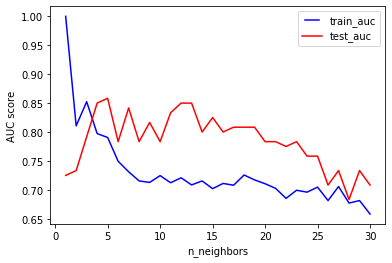

In [15]:
neighbors = list(range(1,31))
train_results = []
test_results = []
for n in neighbors:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
line1, = plt.plot(neighbors, train_results, "b" , label = "train_auc")
line2, = plt.plot(neighbors, test_results, "r" , label = "test_auc")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_neighbors")